In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
caminho = 'tabela_imigrantes.xlsx'
tabela_original = pd.read_excel(caminho)
tabela_original.head(5)

,data_entrada_brasil,data_cadastro,dif_dtcad_dtingr_meses,sexo,fx_etaria,pais_origem,distrito_moradia,condicoes_moradia,cidade_ingresso,cor_raca,escolaridade,situacao_migratoria,fonte_renda,sabendo_crai,demanda_1
0,2012-09-09 00:00:00,2016-05-27 14:23:24.160,44,Masculino,Maiores de 60 anos,Afeganistão,Liberdade,Aluguel ou pensão,Não informado,Amarela,Ensino superior incompleto,Visto permanente,Não informado,Não informado,Documentos
1,2015-06-16 00:00:00,2017-05-31 12:42:03.000,23,Masculino,18 a 29 anos,Afeganistão,Brás,Aluguel ou pensão,Foz do Iguaçu,Branca,Ensino superior incompleto,Solicitante de refúgio,Trabalhador informal ou ambulante,Serviço público,Regularização migratória
2,2010-03-05 00:00:00,2018-03-19 17:33:35.000,96,Masculino,18 a 29 anos,Afeganistão,Pari,Aluguel ou pensão,Guarulhos,Branca,Ensino fundamental incompleto,Visto permanente,"Empresário (MEI, dono de loja, restaurante, etc.)",Instituições ou organizações,Regularização migratória
3,2012-07-25 00:00:00,2018-11-27 15:39:34.004,76,Masculino,18 a 29 anos,Afeganistão,Outro Município,Casa de parente ou amigo,Guarulhos,Branca,Ensino superior incompleto,Visto permanente,Trabalhador informal ou ambulante,Amigos ou parentes,Reinserção no mercado de trabalho
4,2008-10-10 00:00:00,2019-01-10 12:50:49.779,123,Masculino,40 a 49 anos,Afeganistão,Brás,Casa de parente ou amigo,Guarulhos,Branca,Não frequentou escola,Visto permanente,Trabalhador informal ou ambulante,Amigos ou parentes,Regularização migratória


In [3]:
tabela_original['data_entrada_brasil'] = pd.to_datetime(tabela_original['data_entrada_brasil'], errors='coerce')

#remover linhas onde a data não pôde ser reconhecida porque tava dando erro na hr de selecionar so acima do ano 2000
tabela_nova = tabela_original.dropna(subset=['data_entrada_brasil'])

# Remover todas as linhas em que o ano da coluna 'data_entrada_brasil' seja menor do que 2000
tabela_nova = tabela_nova.loc[tabela_nova['data_entrada_brasil'].dt.year >= 2000]

len(tabela_nova)

11153

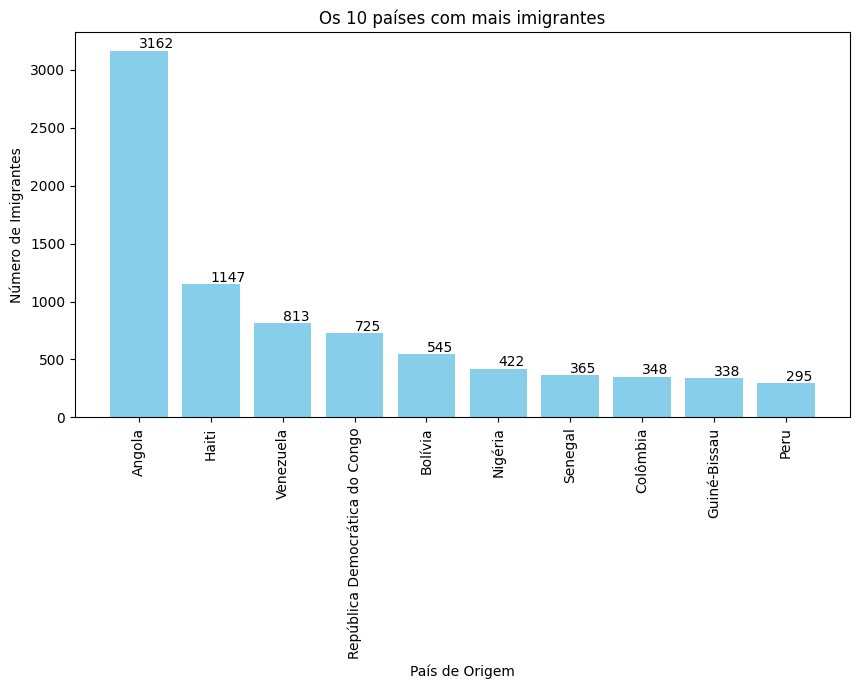

In [74]:
# Contar o número de imigrantes de cada país
contagem_paises = tabela_nova['pais_origem'].value_counts()

# Selecionar os 10 países com mais imigrantes
dez_paises = contagem_paises[:10]

# Criar um gráfico de barras
plt.figure(figsize=(10,5))
bars = plt.bar(dez_paises.index, dez_paises.values, color='skyblue')

# Adicionar a quantidade de imigrantes no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom') # va: vertical alignment

plt.title('Os 10 países com mais imigrantes')
plt.xlabel('País de Origem')
plt.ylabel('Número de Imigrantes')

plt.xticks(rotation=90)

plt.show()


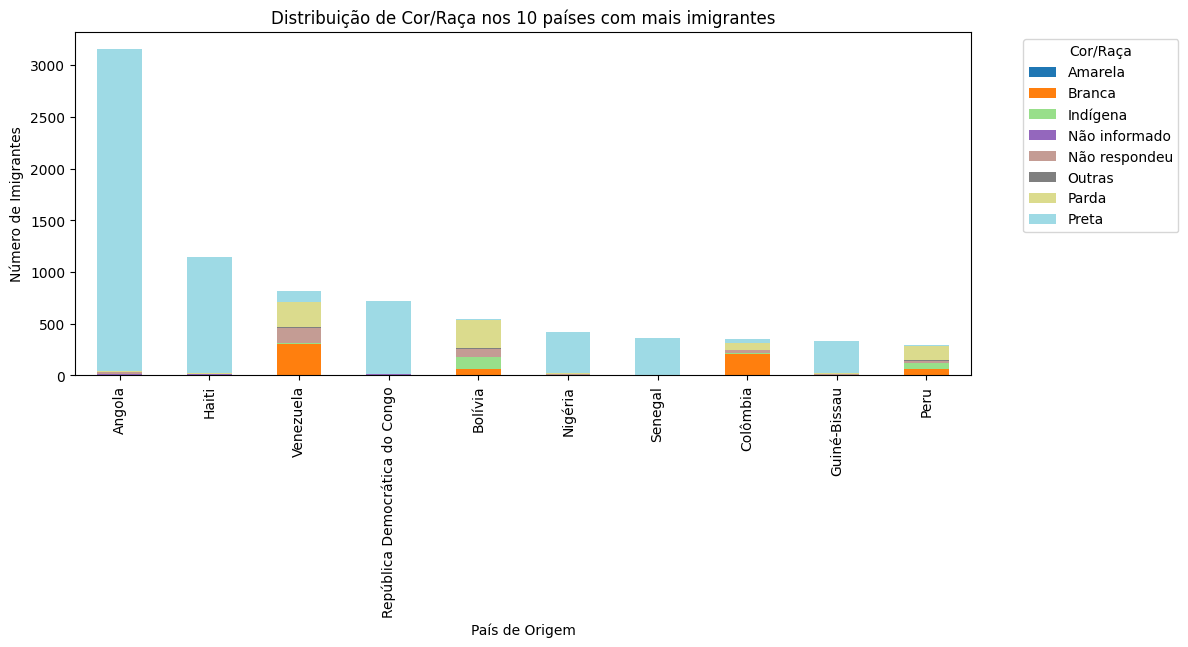

In [75]:
contagem_paises = tabela_nova['pais_origem'].value_counts()

# Seleccionar los 10 países con más inmigrantes
dez_paises = contagem_paises[:10].index

# Filtrar los datos para incluir solo estos 10 países
dados_filtrados = tabela_nova[tabela_nova['pais_origem'].isin(dez_paises)]

# Agrupar por país de origen y color/raza, luego contar los registros
distribuicao_cor_raca = dados_filtrados.groupby(['pais_origem', 'cor_raca']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
distribuicao_cor_raca.loc[dez_paises].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Añadir título y etiquetas
plt.title('Distribuição de Cor/Raça nos 10 países com mais imigrantes')
plt.xlabel('País de Origem')
plt.ylabel('Número de Imigrantes')
plt.xticks(rotation=45)
plt.legend(title='Cor/Raça', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()

plt.xticks(rotation=90)

plt.show()

### Boxplot relacionando diferença de entrada no brasil x Cadastros X Situação migratoria

C:\Users\Biiel\AppData\Local\Temp\ipykernel_7636\1656650469.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dif_dtcad_dtingr_meses'] = pd.to_numeric(df['dif_dtcad_dtingr_meses'], errors='coerce')
C:\Users\Biiel\AppData\Local\Temp\ipykernel_7636\1656650469.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='situacao_migratoria', y='dif_dtcad_dtingr_meses', data=df, palette=cores_personalizadas, showfliers=False)


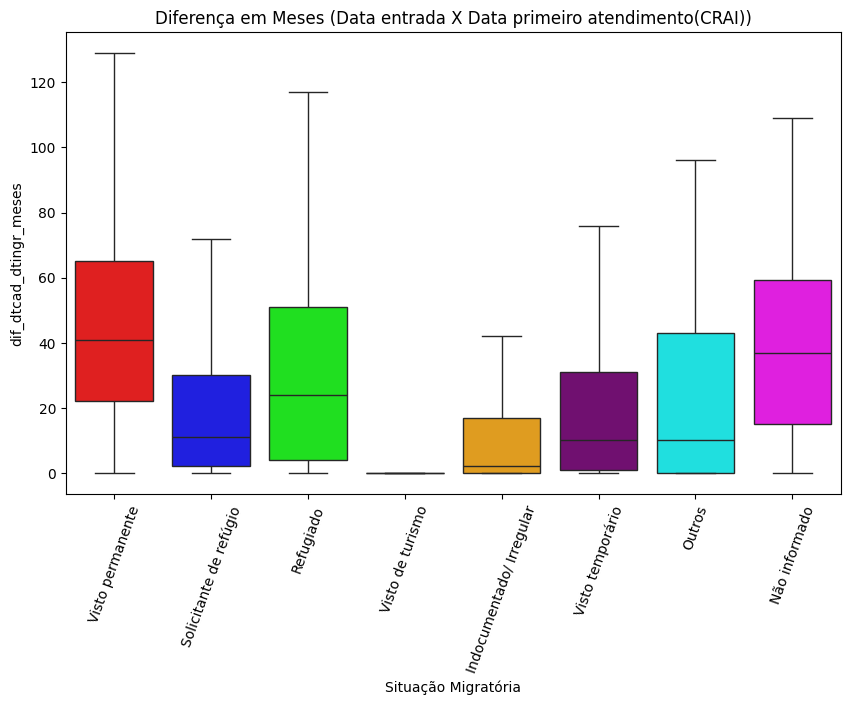

In [13]:
df = tabela_nova[['dif_dtcad_dtingr_meses', 'situacao_migratoria']]

# Converter a coluna 'dif_dtcad_dtingr_meses' para numérico, substituindo valores inválidos por NaN
df['dif_dtcad_dtingr_meses'] = pd.to_numeric(df['dif_dtcad_dtingr_meses'], errors='coerce')

# Definir uma paleta de 8 cores
cores_personalizadas = ['#FF0000', '#0000FF', '#00FF00', '#FFFF00', '#FFA500', '#800080', '#00FFFF', '#FF00FF']

# Criar a figura para o boxplot
plt.figure(figsize=(10, 6))

# Gerar o boxplot usando seaborn com a paleta personalizada
sns.boxplot(x='situacao_migratoria', y='dif_dtcad_dtingr_meses', data=df, palette=cores_personalizadas, showfliers=False)

# Adicionar um título ao gráfico
plt.title('Diferença em Meses (Data entrada X Data primeiro atendimento(CRAI))')
plt.xlabel('Situação Migratória')
plt.xticks(rotation=70)

plt.show()

### Grafico que mostre a situacao migratoria durando a historia

C:\Users\Biiel\AppData\Local\Temp\ipykernel_772\1404868315.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['ano_entrada'] = df_filtrado['data_entrada_brasil'].dt.year


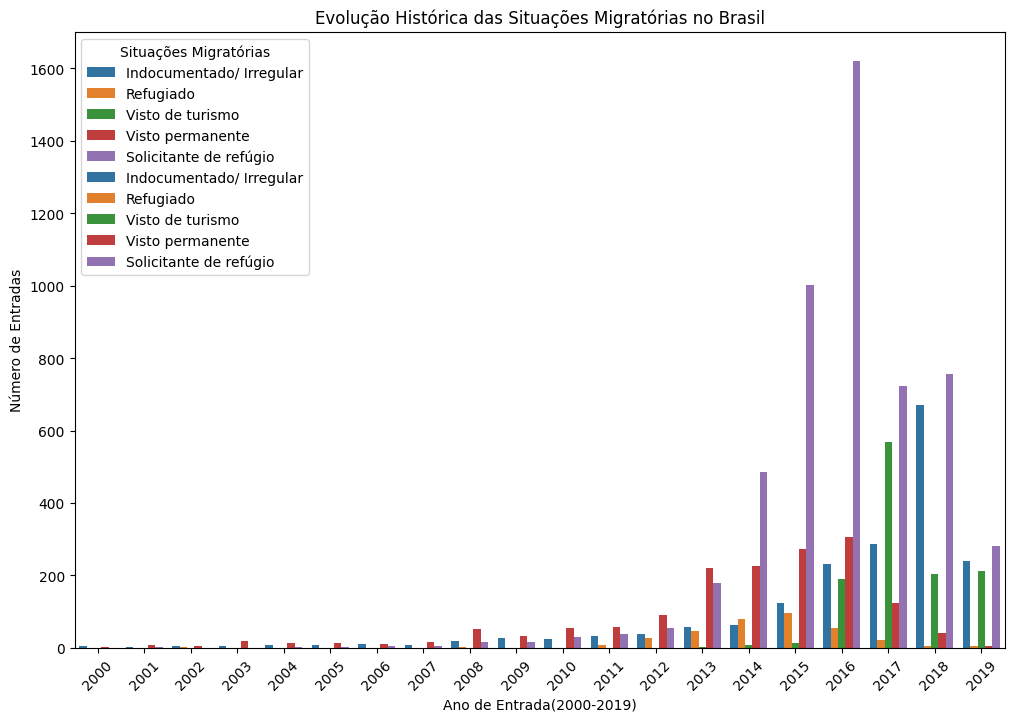

In [32]:
data_entrada = tabela_nova[['data_entrada_brasil', 'situacao_migratoria']]

df_entrada_br = pd.DataFrame(data_entrada)

df_entrada_br['data_entrada_brasil'] = pd.to_datetime(df_entrada_br['data_entrada_brasil'], errors='coerce')

# Filtrar os dados para as situações migratórias de interesse
situacoes_migratorias = ['Visto permanente', 'Solicitante de refúgio', 'Visto de turismo', 'Indocumentado/ Irregular', 'Refugiado']
df_filtrado = df_entrada_br[df_entrada_br['situacao_migratoria'].isin(situacoes_migratorias)]

# Extrair o ano da data de entrada
df_filtrado['ano_entrada'] = df_filtrado['data_entrada_brasil'].dt.year

# Contar o número de ocorrências por ano e situação migratória
evolucao_migratoria = df_filtrado.groupby(['ano_entrada', 'situacao_migratoria']).size().reset_index(name='contagem')


# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='ano_entrada', y='contagem', hue='situacao_migratoria', data=evolucao_migratoria)
sns.barplot(x='ano_entrada', y='contagem', hue='situacao_migratoria', data=evolucao_migratoria)

# Adicionar um título ao gráfico
plt.title('Evolução Histórica das Situações Migratórias no Brasil')

# Rotular os eixos
plt.xlabel('Ano de Entrada(2000-2019)')
plt.ylabel('Número de Entradas')
plt.legend(title='Situações Migratórias')


# Melhorar a legibilidade do eixo x
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()

# Captura a paleta de cores usada no primeiro gráfico
cores_primeiro_grafico = {entry.get_text(): color.get_facecolor()[:3] for entry, color in zip(ax.get_legend().get_texts(), ax.get_legend().get_patches())}

### Gráfico de cima de 2010-2019

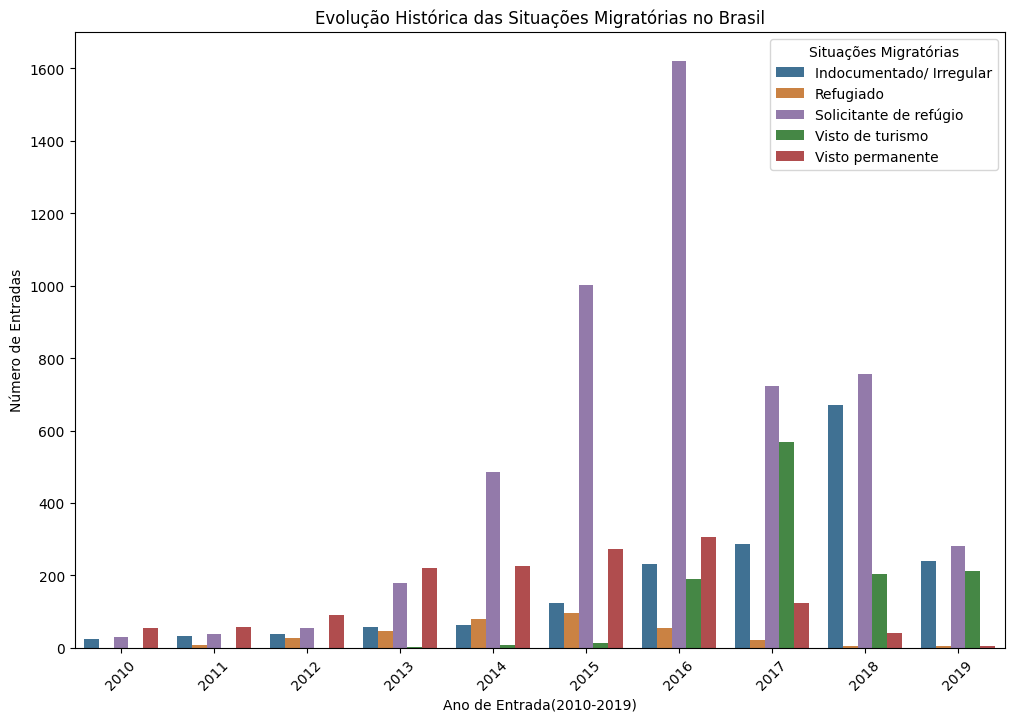

In [34]:
# Filtrar os dados a partir de 2010
df_filtrado = df_filtrado[df_filtrado['ano_entrada'] >= 2010]

# Contar o número de ocorrências por ano e situação migratória
evolucao_migratoria = df_filtrado.groupby(['ano_entrada', 'situacao_migratoria']).size().reset_index(name='contagem')

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='ano_entrada', y='contagem', hue='situacao_migratoria', data=evolucao_migratoria, palette=cores_primeiro_grafico)

# Adicionar um título ao gráfico
plt.title('Evolução Histórica das Situações Migratórias no Brasil')

# Rotular os eixos
plt.xlabel('Ano de Entrada(2010-2019)')
plt.ylabel('Número de Entradas')
plt.legend(title='Situações Migratórias')


# Melhorar a legibilidade do eixo x
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()


### Evolucao da faixa etaria durante a historia

C:\Users\Biiel\AppData\Local\Temp\ipykernel_7636\2534226615.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  evolucao_migratoria = df_filtrado.groupby(['ano_entrada', 'fx_etaria']).size().reset_index(name='contagem')


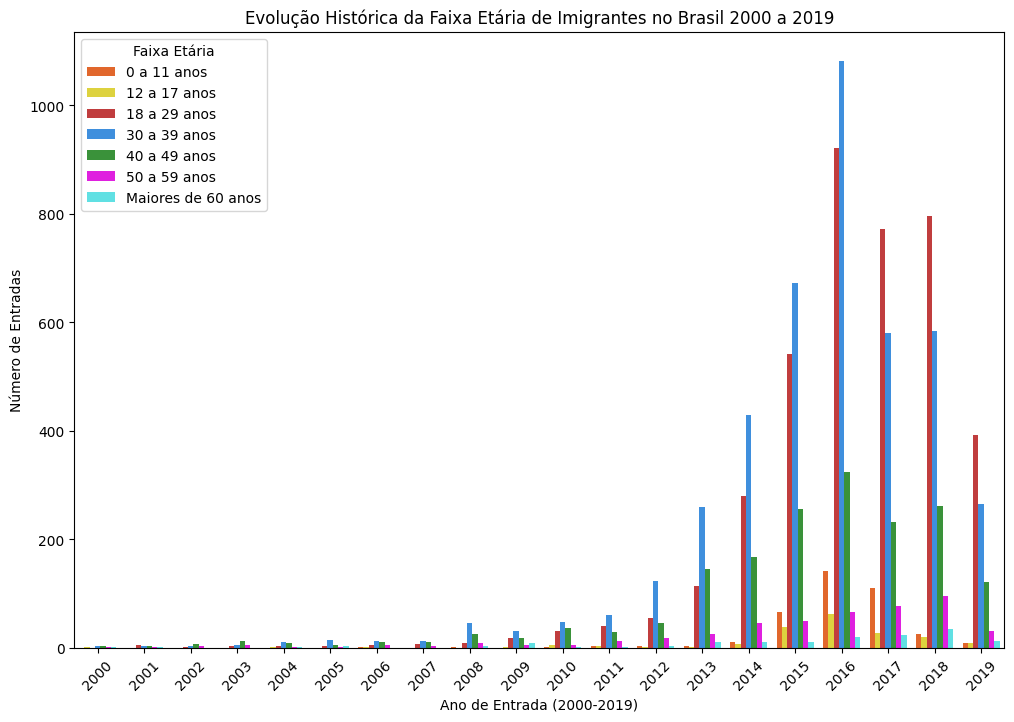

In [11]:
data_entrada = tabela_nova[['data_entrada_brasil', 'fx_etaria']]
df_entrada_br = pd.DataFrame(data_entrada)

df_entrada_br['data_entrada_brasil'] = pd.to_datetime(df_entrada_br['data_entrada_brasil'], errors='coerce')


fxs_etaria = ['0 a 11 anos', '12 a 17 anos', '18 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', 'Maiores de 60 anos']
df_filtrado = df_entrada_br[df_entrada_br['fx_etaria'].isin(fxs_etaria)]

# Definir a ordem da faixa etária
df_filtrado['fx_etaria'] = pd.Categorical(df_filtrado['fx_etaria'], categories=fxs_etaria, ordered=True)

df_filtrado['ano_entrada'] = df_filtrado['data_entrada_brasil'].dt.year


evolucao_migratoria = df_filtrado.groupby(['ano_entrada', 'fx_etaria']).size().reset_index(name='contagem')

custom_palette = ['#FF5C0E', '#F7E925','#d62728', '#258FF7', '#2ca02c', '#ff00ff', '#4AF5F9']


plt.figure(figsize=(12, 8))
sns.barplot(x='ano_entrada', y='contagem', hue='fx_etaria', data=evolucao_migratoria, palette=custom_palette)

plt.title('Evolução Histórica da Faixa Etária de Imigrantes no Brasil 2000 a 2019')

plt.xlabel('Ano de Entrada (2000-2019)')
plt.ylabel('Número de Entradas')
plt.legend(title='Faixa Etária', loc='upper left')


plt.xticks(rotation=45)

plt.show()
